# Run streamlit app from a Google Colab Notebook
To set-up the first step is to run the below code cell, then you must immeadiately restart the runtime by going to Runtime>Restart Runtime


In [1]:
!pip install -q streamlit
!pip install -q tableone
!pip install -q lifelines

     |████████████████████████████████| 7.8MB 4.4MB/s 
     |████████████████████████████████| 174kB 41.5MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 112kB 44.8MB/s 
     |████████████████████████████████| 4.2MB 23.9MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 122kB 46.9MB/s 
     |████████████████████████████████| 788kB 33.5MB/s 
     |████████████████████████████████| 368kB 39.9MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
     |████████████████████████████████| 358kB 4.3MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 


Reset the execution environment after streamlit installation

In [ ]:
from google.colab import drive
import streamlit as st
import pandas as pd
import numpy as np
import datetime as dt
import os
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
import tableone as tab1
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
datafolder = f'/content/gdrive/MyDrive/Hackathon/data/'
workfolder = f'/content/gdrive/MyDrive/Hackathon/'

if not os.path.exists(workfolder):
    os.mkdir(workfolder)

#Directory is changed to a "work folder" where code files are kept
os.chdir(workfolder)\

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Mounted at /content/gdrive


# Possible Variables of Interest

In [ ]:
import glob
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt
import plotly.graph_objects as go
from google.colab import drive
import os

drive.mount('/content/gdrive')
datafolder = f'/content/gdrive/MyDrive/Hackathon/data/'
workfolder = f'/content/gdrive/MyDrive/Hackathon/'

if not os.path.exists(workfolder):
    os.mkdir(workfolder)

#Directory is changed to a "work folder" where code files are kept
os.chdir(workfolder)\

#Before a new variable is must be first added to this list of valid columns
# cols = ["participant_id","visit_name","sex","Phenotype","hoehn_and_yahr_stage","mds_updrs_part_i_summary_score",
#         "mds_updrs_part_ii_summary_score","mds_updrs_part_iii_summary_score","mds_updrs_part_iv_summary_score",
#         "age_at_baseline","age_at_diagnosis","date_visit","date_baseline"]

d = pd.DataFrame()
#Reads all files in the datafolder and combines them into one dataset
for file in glob.glob(f'{datafolder}/*.csv'):
  dt = pd.read_csv(file)
  #dt = dt.loc[:,(dt.columns.isin(cols))]
  d = d.append(dt)

#Renames column names to be more user friendly
d.loc[:,"HY"] = d.hoehn_and_yahr_stage
d = d.rename({"mds_updrs_part_i_summary_score" : "UPDRS1",
        "mds_updrs_part_ii_summary_score":"UPDRS2","mds_updrs_part_iii_summary_score":"UPDRS3",
        "mds_updrs_part_iv_summary_score":"UPDRS4"}, axis = 1)

d = d[d.Phenotype == "PD"]

d.loc[:,"BL_durdx"] = d.age_at_baseline - d.age_at_diagnosis
d.loc[:,"daysB"] = (d.date_visit - d.date_baseline).fillna(d.visit_month * 30)
d.loc[:,"daysDx"] = (d.daysB + d.BL_durdx * 365.25).round(2)
d.loc[:,"yearsDx"] = (d.daysDx / 365.25).round(0)

d.columns

After the above code cell is run, all you need to do is take the "Processed Datasets" zip file in the Hackathon folder. The below code cell will take care of the rest of set-up. 

#Code for Creating a Basic Sankey Diagram

In [ ]:
import glob
import streamlit as st
import pandas as pd
import numpy as np
import altair as alt
import plotly.graph_objects as go

#Before a new variable is must be first added to this list of valid columns
cols = ["participant_id","visit_name", "Phenotype","hoehn_and_yahr_stage","mds_updrs_part_i_summary_score",
        "mds_updrs_part_ii_summary_score","mds_updrs_part_iii_summary_score","mds_updrs_part_iv_summary_score",
        "age_at_baseline","age_at_diagnosis","date_visit","date_baseline"]

d = pd.DataFrame()
#Reads all files in the datafolder and combines them into one dataset
for file in glob.glob(f'{datafolder}/*.csv'):
  dt = pd.read_csv(file)
  dt = dt.loc[:,(dt.columns.isin(cols))]
  d = d.append(dt)

#Renames column names to be more user friendly
d.loc[:,"HY"] = d.hoehn_and_yahr_stage
d = d.rename({"mds_updrs_part_i_summary_score" : "UPDRS1",
        "mds_updrs_part_ii_summary_score":"UPDRS2","mds_updrs_part_iii_summary_score":"UPDRS3",
        "mds_updrs_part_iv_summary_score":"UPDRS4"}, axis = 1)

#At this juncture we remove all non-PD patients, later this will be amended to give users the option to include or exclude controls
d = d[d.Phenotype == "PD"]

#Creates variables for determining the years since diagnosis
d.loc[:,"BL_durdx"] = d.age_at_baseline - d.age_at_diagnosis
d.loc[:,"daysB"] = (d.date_visit - d.date_baseline).fillna(d.visit_month * 30)
d.loc[:,"daysDx"] = (d.daysB + d.BL_durdx * 365.25).round(2)
d.loc[:,"yearsDx"] = (d.daysDx / 365.25).round(0)

#These variables are normally determined by the streamlit user, but for test purposes they are set
# to default values. ny corresponds to years since diagnosis, nl corrseponds to the number of levels of a variable
ny = 10
nl = 3

d = d[(d.yearsDx >= 0) & (d.yearsDx <= ny)]
yearsDx = "Years Since Diagnosis"

ydx = d.copy()#.loc[:,["participant_id",yearsDx,"HY"]].dropna().drop_duplicates(keep="first", subset = ["participant_id",yearsDx])
ydx.loc[:,"HY"] = ydx.HY.round()
ydx.loc[:,"HY3"] = ["0" if i < 3 
                      else "1" for i in ydx.HY]

SNK = ydx.pivot_table(values = "HY3", index = "participant_id", columns = "yearsDx", aggfunc = 'max')
SNK.columns = range(0,ny+1)
SNK = SNK.fillna(2)

count = SNK.reset_index().pivot_table(values = "participant_id", columns = range(0,ny+1), aggfunc = "count")

count = count.melt()


MC2 = pd.DataFrame()
for i in range(0,ny):
  MC = count.iloc[:,[i,(i+1),ny+1]].groupby([i,(i+1)]).agg(sum).reset_index()
  MC.columns = ["SRC","TRGT","VAL"]
  MC = MC.astype(int)
  #MC = MC[MC.SRC != MC.TRGT].sort_values(["SRC","TRGT"])
  MC.iloc[:,1] = [int(x)+(nl*i)+nl for x in list(MC.iloc[:,1])]
  if i > 0:
    MC.iloc[:,0] = [int(x)+(nl*i) for x in list(MC.iloc[:,0])]
  MC2 = MC2.append(MC)

MC2 = MC2.sort_values("SRC")

if nl == 2:
  labl = ["HY<3", "HY>=3"]* int(len(MC2) / nl)
elif nl == 3:
  labl = ["HY<3", "HY>=3", "CENS"] * int(len(MC2) / nl)

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labl,
      color = "blue"
    ),
    link = dict(
      source = np.array(MC2.SRC), # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = np.array(MC2.TRGT),
      value = np.array(MC2.VAL)
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (18,49) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,13,14,18,19,20,22,43,44,45,46,47,48,49,50,55,56,57,58,59,60,61,62,63,64,65,66,67,70,78,102,103,104,139,140,182,184) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (11,12,13,17,18,19,21,42,43,44,45,46,47,48,49,54,55,56,57,58,59,60,61,62,63,64,65,66,69,77,101,102,103,138,139,181,183) have mixed types.Specify dtype option on import or set low_memory=False.



AttributeError: ignored

# Code for Creating GO Bar Graph

In [ ]:
from google.colab import drive
import streamlit as st
import pandas as pd
import numpy as np
import datetime as dt
import glob
import os
import altair as alt
import plotly.graph_objects as go
import plotly.express as px

drive.mount('/content/gdrive')
datafolder = f'/content/gdrive/MyDrive/Hackathon/data'
workfolder = f'/content/gdrive/MyDrive/Hackathon/'

os.chdir(workfolder)\

#Before a new variable is must be first added to this list of valid columns
cols = ["participant_id","visit_name","sex","Phenotype","hoehn_and_yahr_stage","mds_updrs_part_i_summary_score",
        "mds_updrs_part_ii_summary_score","mds_updrs_part_iii_summary_score","mds_updrs_part_iv_summary_score",
        "age_at_baseline","age_at_diagnosis","date_visit","date_baseline"]

d = pd.DataFrame()
#Reads all files in the datafolder and combines them into one dataset
for file in glob.glob(f'{datafolder}/*.csv'):
  dt = pd.read_csv(file)
  dt = dt.loc[:,(dt.columns.isin(cols))]
  d = d.append(dt)

#Renames column names to be more user friendly
d = d.rename({"hoehn_and_yahr_stage" : "HY","mds_updrs_part_i_summary_score" : "UPDRS1",
        "mds_updrs_part_ii_summary_score":"UPDRS2","mds_updrs_part_iii_summary_score":"UPDRS3",
        "mds_updrs_part_iv_summary_score":"UPDRS4"}, axis = 1)

d = d[d.Phenotype == "PD"]

d.loc[:,"BL_durdx"] = d.age_at_baseline - d.age_at_diagnosis
d.loc[:,"daysB"] = d.date_visit - d.date_baseline
d.loc[:,"daysDx"] = (d.daysB + d.BL_durdx * 365.25).round(2)
d.loc[:,"yearsDx"] = (d.daysDx / 365.25).round(0)

yearsDx = "Years Since Diagnosis"

d = d[(d.yearsDx > 0)]
#slice_width = 2.5

#d.loc[:,"yearsDx"] = (d.yearsDx / slice_width).round(0) * slice_width
d.loc[:,"HY3"] = ["HY<3" if i < 3 
                          else "HY>=3" for i in d.HY]
d.loc[:,"age_bin"] = ["<50" if i < 50
                            else ">50" for i in d.age_at_diagnosis]

STK = d.pivot_table(index = "yearsDx", values = 'participant_id', columns = "HY3", aggfunc = 'count')

fig = go.Figure(data=[
    go.Bar(name=STK.columns[0], x=STK.index, y=STK.iloc[:,0], hovertext = ("N=" + STK.iloc[:,0].astype(str))),
    go.Bar(name=STK.columns[1], x=STK.index, y=STK.iloc[:,1], hovertext = ("N=" + STK.iloc[:,1].astype(str)))
                     ])
# Change the bar mode
fig.update_layout(barmode='relative', barnorm = "percent")
fig.show()

d.loc[:,"HY3"] = ["HY<3" if i < 3 
                          else "HY>=3" for i in d.HY]


for var in ["UPDRS1","UPDRS2","UPDRS3","UPDRS4"]:
  max = d.loc[:,var].max()
  d.loc[:,var] = [("<" + str(round((max * .2),0)))  if i < round((max * .2),0)
                          else ("<" + str(round((max * .4),0))) if i < round((max * .4),0)
                          else ("<" + str(round((max * .6),0)))  if i < round((max * .6),0)
                          else ("<" + str(round((max * .8), 0)))  if i < round((max * .8), 0)
                          else ("<" + str(round(max, 0)))  if i <= round(max, 0)
                          else np.nan for i in d.loc[:,var]]

d

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,13,14,16,17,18,19,20,22,41,42,43,44,45,46,47,48,53,54,55,56,57,58,59,60,61,62,63,64,65,67,75,98,99,100,135,136,178,180) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (18,49) have mixed types.Specify dtype option on import or set low_memory=False.



,participant_id,visit_name,date_visit,date_baseline,age_at_baseline,sex,Phenotype,age_at_diagnosis,HY,UPDRS1,UPDRS2,UPDRS3,UPDRS4,BL_durdx,daysB,daysDx,yearsDx,HY3,age_bin
1,PDAA503EF5,Baseline,15687.0,15687.0,70.550000,Female,PD,66.000000,2.0,<16.0,<20.0,<22.0,<5.0,4.550000,0.0,1661.89,5.0,HY<3,>50
2,PDAA503EF5,Screening,15688.0,15687.0,70.550000,Female,PD,66.000000,NaN,NaN,NaN,NaN,NaN,4.550000,1.0,1662.89,5.0,HY>=3,>50
3,PDAA503EF5,6 months,15870.0,15687.0,70.550000,Female,PD,66.000000,2.0,<16.0,<20.0,<22.0,<5.0,4.550000,183.0,1844.89,5.0,HY<3,>50
4,PDAA503EF5,12 months,16050.0,15687.0,70.550000,Female,PD,66.000000,2.0,<23.0,<20.0,<43.0,<14.0,4.550000,363.0,2024.89,6.0,HY<3,>50
5,PDAA503EF5,18 months,16266.0,15687.0,70.550000,Female,PD,66.000000,2.0,<16.0,<20.0,<43.0,<5.0,4.550000,579.0,2240.89,6.0,HY<3,>50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1254,BL,16436.0,16436.0,76.000000,Male,PD,68.000000,NaN,<8.0,<10.0,<43.0,<10.0,8.000000,0.0,2922.00,8.0,HY>=3,>50
214,1255,BL,16436.0,16436.0,72.999316,Male,PD,68.246407,NaN,<8.0,<20.0,<43.0,<10.0,4.752909,0.0,1736.00,5.0,HY>=3,>50
220,1240,BL,16467.0,16467.0,73.084189,Male,PD,58.247775,NaN,<8.0,<10.0,<43.0,<10.0,14.836413,0.0,5419.00,15.0,HY>=3,>50
224,1258,BL,16467.0,16467.0,60.084873,Male,PD,56.413415,NaN,<16.0,<10.0,<22.0,<5.0,3.671458,0.0,1341.00,4.0,HY>=3,>50


# Code for Creating Line Plots

In [ ]:
from google.colab import drive
import streamlit as st
import pandas as pd
import numpy as np
import datetime as dt
import glob
import os
import altair as alt
import plotly.graph_objects as go
import plotly.express as px

drive.mount('/content/gdrive')
datafolder = f'/content/gdrive/MyDrive/Hackathon/data'
workfolder = f'/content/gdrive/MyDrive/Hackathon/'

os.chdir(workfolder)\

#Before a new variable is must be first added to this list of valid columns
cols = ["participant_id","visit_name","sex","Phenotype","hoehn_and_yahr_stage","mds_updrs_part_i_summary_score",
        "mds_updrs_part_ii_summary_score","mds_updrs_part_iii_summary_score","mds_updrs_part_iv_summary_score",
        "age_at_baseline","age_at_diagnosis","date_visit","date_baseline"]

d = pd.DataFrame()
#Reads all files in the datafolder and combines them into one dataset
for file in glob.glob(f'{datafolder}/*.csv'):
  dt = pd.read_csv(file)
  dt = dt.loc[:,(dt.columns.isin(cols))]
  d = d.append(dt)

#Renames column names to be more user friendly
d = d.rename({"hoehn_and_yahr_stage" : "HY","mds_updrs_part_i_summary_score" : "UPDRS1",
        "mds_updrs_part_ii_summary_score":"UPDRS2","mds_updrs_part_iii_summary_score":"UPDRS3",
        "mds_updrs_part_iv_summary_score":"UPDRS4"}, axis = 1)

d = d[d.Phenotype == "PD"]

d.loc[:,"BL_durdx"] = d.age_at_baseline - d.age_at_diagnosis
d.loc[:,"daysB"] = d.date_visit - d.date_baseline
d.loc[:,"daysDx"] = (d.daysB + d.BL_durdx * 365.25).round(2)
d.loc[:,"yearsDx"] = (d.daysDx / 365.25).round(0)

yearsDx = "Years Since Diagnosis"

d = d[(d.yearsDx > 0)]
#slice_width = 2.5

#d.loc[:,"yearsDx"] = (d.yearsDx / slice_width).round(0) * slice_width
d.loc[:,"HY3"] = ["HY<3" if i < 3 
                          else "HY>=3" for i in d.HY]
d.loc[:,"age_bin"] = ["<50" if i < 50
                            else ">50" for i in d.age_at_diagnosis]
var = "UPDRS1"

alt.data_transformers.enable('default', max_rows=None)

source = pd.DataFrame({
              'Years Since Diagnosis': d["yearsDx"],
              'UPDRS1': d["UPDRS1"]
          })

base = alt.Chart(source).mark_circle(opacity=0, color='black'

          ).encode(
              alt.X('Years Since Diagnosis:Q',
                    axis=alt.Axis(grid=False)),
              alt.Y('UPDRS1:Q',
                    axis=alt.Axis(grid=False))
          ).properties(width = 750, height = 500)

          # Creating 95 CI
band = alt.Chart(source).mark_errorband(extent='ci', color ='blue').encode(
              alt.X('Years Since Diagnosis:Q',
                    axis=alt.Axis(grid=False)),
              alt.Y('UPDRS1:Q',
                    axis=alt.Axis(grid=False)),   
          )

base = base + band + base.transform_loess('Years Since Diagnosis', 'UPDRS1',
                                      groupby=['category']).mark_line(size=4, color="blue")


base

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,13,14,16,17,18,19,20,22,41,42,43,44,45,46,47,48,53,54,55,56,57,58,59,60,61,62,63,64,65,67,75,98,99,100,135,136,178,180) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (18,49) have mixed types.Specify dtype option on import or set low_memory=False.



alt.LayerChart(...)

# Code for Creating Demographic Overview

In [ ]:
import tableone as t1
import pandas as pd
import numpy as np
import glob
import os
import altair as alt
import plotly.graph_objects as go
import plotly.express as px

drive.mount('/content/gdrive')
datafolder = f'/content/gdrive/MyDrive/Hackathon/data'
workfolder = f'/content/gdrive/MyDrive/Hackathon/'

os.chdir(workfolder)\

#Before a new variable is must be first added to this list of valid columns
cols = ["participant_id","visit_month","sex",'race', 'education_level', 'education_years',
        'primary_diagnosis','dx_essential_bradykinesia','dx_essential_rest_tremor',
       'dx_essential_rigidity', "Phenotype","hoehn_and_yahr_stage","mds_updrs_part_i_summary_score",
        "mds_updrs_part_ii_summary_score","mds_updrs_part_iii_summary_score","mds_updrs_part_iv_summary_score",
        "age_at_baseline","age_at_diagnosis","date_visit","date_baseline"]

d = pd.DataFrame()
#Reads all files in the datafolder and combines them into one dataset
for file in glob.glob(f'{datafolder}/*.csv'):
  dt = pd.read_csv(file)
  dt = dt.loc[:,(dt.columns.isin(cols))]
  d = d.append(dt)

#Renames column names to be more user friendly
d = d.rename({"hoehn_and_yahr_stage" : "HY","mds_updrs_part_i_summary_score" : "UPDRS1",
        "mds_updrs_part_ii_summary_score":"UPDRS2","mds_updrs_part_iii_summary_score":"UPDRS3",
        "mds_updrs_part_iv_summary_score":"UPDRS4"}, axis = 1)

#d = d[d.Phenotype == "PD"]

d.loc[:,"BL_durdx"] = d.age_at_baseline - d.age_at_diagnosis
d.loc[:,"daysB"] = d.date_visit - d.date_baseline
d.loc[:,"daysDx"] = (d.daysB + d.BL_durdx * 365.25).round(2)
d.loc[:,"yearsDx"] = (d.daysDx / 365.25).round(0)

yearsDx = "Years Since Diagnosis"

d = d[(d.yearsDx > 0)]

if 1 == 1:

  cats = ['sex','Phenotype','race','education_level','primary_diagnosis','hx_depression',
          'antidepressant_use','bradykinesia', 'resting_tremor',
          'rigidity']
  nnml = ['age_at_baseline','age_at_diagnosis','education_years','BL_durdx','UPDRS1', 'UPDRS2', 'UPDRS3', 'UPDRS4','depress_test_score','MoCA']

  foc = st.sidebar.selectbox("Select a Focus", ["Overall","Demographic","Motor","Non-Motor","Choose-Your-Own"])

  if foc == "Overall":
    # columns to summarize
    columns = ['sex','Phenotype','race','education_level','primary_diagnosis','age_at_baseline',
              'age_at_diagnosis','education_years','BL_durdx','UPDRS1', 'UPDRS2', 'UPDRS3', 'UPDRS4']

    # columns containing categorical variables
    categorical = [i for i in cats if i in columns] 

    # non-normal variables
    nonnormal = [i for i in nnml if i in columns]

  # alternative labels
  #labels={'death': 'Mortality'}

  # set decimal places for age to 0
  #decimals = {"Age": 0}

  # optionally, a categorical variable for stratification
  #groupby = ['visit_month']

  # rename the death column
  #labels={'death': 'Mortality'}

  # display minimum and maximum for listed variables
  #min_max = ['Height']


  dt = t1.TableOne(d.drop_duplicates(subset = "participant_id",keep="first").reset_index(), columns=columns, categorical=categorical,
                      nonnormal=nonnormal, order = order)
  


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,13,14,16,17,18,19,20,22,41,42,43,44,45,46,47,48,53,54,55,56,57,58,59,60,61,62,63,64,65,67,75,98,99,100,135,136,178,180) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (18,49) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/tableone/tableone.py:1420: UserWarning:

Order variable not found: rigidity

/usr/local/lib/python3.7/dist-packages/tableone/tableone.py:1420: UserWarning:

Order variable not found: resting_tremor

/usr/local/lib/python3.7/dist-packages/tableone/tableone.py:1420: UserWarning:

Order variable not found: bradykinesia



Missing           Overall
n                                                                                               3851
sex, n (%)                       Female                                          2       1911 (49.6)
                                 Male                                                    1938 (50.4)
Phenotype, n (%)                 Other                                           0        835 (21.7)
                                 PD                                                      3016 (78.3)
race, n (%)                      American Indian or Alaska Native                2           7 (0.2)
                                 Asian                                                      66 (1.7)
                                 Black or African American                                  73 (1.9)
                                 Multi-racial                                               19 (0.5)
                                 Native Hawaiian or Other Pacific Islander                   2 (0.1)
                                 Other                                                      27 (0.7)
                                 Unknown                                                    46 (1.2)
                                 White                                                   3609 (93.8)
education_level, n (%)           <High School                                 1091         110 (4.0)
                                 Associate degree college                                  231 (8.4)
                                 Bachelor's degree                                        752 (27.2)
                                 High School/GED                                          360 (13.0)
                                 Master's degree                                           225 (8.2)
                                 Other                                                       3 (0.1)
                                 Professional or doctoral degree                          666 (24.1)
                                 Some college without degree                              413 (15.0)
primary_diagnosis, n (%)         Corticobasal syndrome                          15           5 (0.1)
                                 Dementia with Lewy bodies                                 128 (3.3)
                                 Essential tremor                                           28 (0.7)
                                 Idiopathic PD                                           3414 (89.0)
                                 Multiple system atrophy                                    47 (1.2)
                                 No PD nor other neurological disorder                       3 (0.1)
                                 Other neurological disorder                                27 (0.7)
                                 Prodromal motor PD                                          1 (0.0)
                                 Progressive supranuclear palsy                             67 (1.7)
                                 Psychogenic parkinsonism                                    1 (0.0)
                                 Vascular parkinsonism                                       1 (0.0)
                                 idiopathic PD                                             114 (3.0)
age_at_baseline, median [Q1,Q3]                                                  0  64.7 [57.0,71.0]
age_at_diagnosis, median [Q1,Q3]                                                 0  61.4 [54.2,67.7]
education_years, median [Q1,Q3]                                               2763  16.0 [14.0,18.0]
BL_durdx, median [Q1,Q3]                                                         0     1.7 [0.7,3.8]
UPDRS1, median [Q1,Q3]                                                        2074    8.0 [4.0,13.0]
UPDRS2, median [Q1,Q3]                                                        2078    8.0 [4.0,14.0]
UPDRS3, median [Q1,Q3]             

# Code for Kaplan-Meier Curves

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (18,49) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,13,14,18,19,20,22,43,44,45,46,47,48,49,50,55,56,57,58,59,60,61,62,63,64,65,66,67,70,78,102,103,104,139,140,182,184) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (11,12,13,17,18,19,21,42,43,44,45,46,47,48,49,54,55,56,57,58,59,60,61,62,63,64,65,66,69,77,101,102,103,138,139,181,183) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:415: DeprecationWarning:

The `plot` function is deprecated, and will be removed in future versions. Use `plot_survival_function`



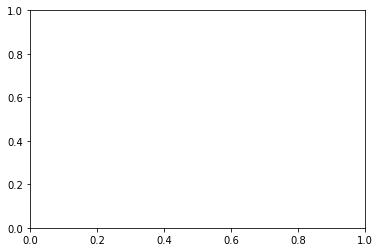

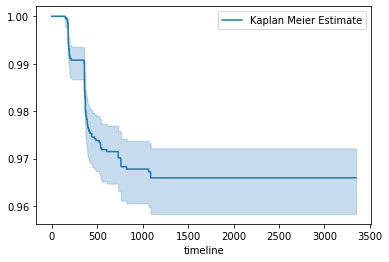

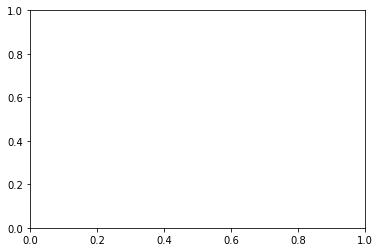

In [ ]:
from lifelines import KaplanMeierFitter
import tableone as t1
import pandas as pd
import numpy as np
import glob
from google.colab import drive
import os
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
datafolder = f'/content/gdrive/MyDrive/Hackathon/data'
workfolder = f'/content/gdrive/MyDrive/Hackathon/'

os.chdir(workfolder)\

#Before a new variable is must be first added to this list of valid columns
cols = ["participant_id","visit_month","sex",'race', 'education_level', 'education_years',
        'primary_diagnosis','dx_essential_bradykinesia','dx_essential_rest_tremor',
       'dx_essential_rigidity', "Phenotype","hoehn_and_yahr_stage","mds_updrs_part_i_summary_score",
        "mds_updrs_part_ii_summary_score","mds_updrs_part_iii_summary_score","mds_updrs_part_iv_summary_score",
        "age_at_baseline","age_at_diagnosis","date_visit","date_baseline"]

d = pd.DataFrame()
#Reads all files in the datafolder and combines them into one dataset
for file in glob.glob(f'{datafolder}/*.csv'):
  dt = pd.read_csv(file)
  dt = dt.loc[:,(dt.columns.isin(cols))]
  d = d.append(dt)

#Renames column names to be more user friendly
d = d.rename({"hoehn_and_yahr_stage" : "HY","mds_updrs_part_i_summary_score" : "UPDRS1",
        "mds_updrs_part_ii_summary_score":"UPDRS2","mds_updrs_part_iii_summary_score":"UPDRS3",
        "mds_updrs_part_iv_summary_score":"UPDRS4"}, axis = 1)

#d = d[d.Phenotype == "PD"]

d.loc[:,"BL_durdx"] = d.age_at_baseline - d.age_at_diagnosis
d.loc[:,"daysB"] = (d.date_visit - d.date_baseline).fillna(d.visit_month * 30)
d.loc[:,"daysDx"] = (d.daysB + d.BL_durdx * 365.25).round(2)
d.loc[:,"yearsDx"] = (d.daysDx / 365.25).round(0)

d = d[d.daysB > 0]

yearsDx = "Years Since Diagnosis"

var = "HY"
cutoff = 3

d = d.dropna(subset = [var])
d.loc[:,"KM_var"] = [1 if i > cutoff 
                     else 0 for i in d.loc[:,var]]

kmv = d.loc[:,["participant_id","KM_var"]].groupby("participant_id").agg(func="max").reset_index()

kmv.columns = ["participant_id","KM_var_ev"]

d = d.merge(kmv,how = "outer")

d_0 = d[d.KM_var_ev == 0].drop_duplicates(subset = "participant_id",keep='last')
d_1 = d[d.KM_var_ev == 1].drop_duplicates(subset = "participant_id",keep="first")

dn = d_0.append(d_1).loc[:,["participant_id","daysB","KM_var"]]

durations = dn.daysB
event_observed = dn.KM_var

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed, label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=True)
fig, ax = plt.subplots()

fig

In [ ]:
d

,participant_id,visit_month,date_visit,date_baseline,age_at_baseline,sex,race,education_years,Phenotype,primary_diagnosis,dx_essential_bradykinesia,dx_essential_rest_tremor,dx_essential_rigidity,age_at_diagnosis,HY,UPDRS1,UPDRS2,UPDRS3,UPDRS4,education_level,BL_durdx,daysB,daysDx,yearsDx,KM_var,KM_var_ev
0,3000,13.0,15400.0,15006.0,70.083504,Female,White,18.0,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,5.0,0.0,1.0,NaN,NaN,NaN,394.0,NaN,NaN,0,0
1,3000,24.0,15737.0,15006.0,70.083504,Female,White,18.0,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,6.0,0.0,4.0,NaN,NaN,NaN,731.0,NaN,NaN,0,0
2,3000,37.0,16130.0,15006.0,70.083504,Female,White,18.0,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,9.0,0.0,2.0,NaN,NaN,NaN,1124.0,NaN,NaN,0,0
3,3000,49.0,16495.0,15006.0,70.083504,Female,White,18.0,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,6.0,0.0,19.0,NaN,NaN,NaN,1489.0,NaN,NaN,0,0
4,3000,62.0,16892.0,15006.0,70.083504,Female,White,18.0,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,11.0,0.0,3.0,NaN,NaN,NaN,1886.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14303,PDZZ318BWK,5.0,16828.0,16688.0,60.820000,Male,White,NaN,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,4.0,2.0,1.0,0.0,Professional or doctoral degree,NaN,140.0,NaN,NaN,0,0
14304,PDZZ318BWK,11.0,17024.0,16688.0,60.820000,Male,White,NaN,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,2.0,3.0,0.0,0.0,Professional or doctoral degree,NaN,336.0,NaN,NaN,0,0
14305,PDZZ318BWK,17.0,17206.0,16688.0,60.820000,Male,White,NaN,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,5.0,1.0,2.0,0.0,Professional or doctoral degree,NaN,518.0,NaN,NaN,0,0
14306,PDZZ318BWK,25.0,17451.0,16688.0,60.820000,Male,White,NaN,Control,No PD nor other neurological disorder,NaN,NaN,NaN,NaN,0.0,2.0,0.0,5.0,0.0,Professional or doctoral degree,NaN,763.0,NaN,NaN,0,0


In [ ]:
# PPMI
t1 = pd.read_csv("data/PPMI_processed.csv")
t2 = pd.read_csv("data/PDBP_processed.csv")
t3 = pd.read_csv("data/BIOFIND_processed.csv")

d = pd.concat([t1,t2,t3], ignore_index=True, axis=0)

pd.DataFrame(d.columns, columns = ["var_name"])

NameError: ignored

#Code for running streamlit 

In [1]:
%%writefile app.py
# Loads libraries required for the app
from google.colab import drive
import streamlit as st
import pandas as pd
import numpy as np
import datetime as dt
import os
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
import tableone as tab1
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# # The current version relies on data stored in Tarek's google drive
# drive.mount('/content/gdrive')
# datafolder = f'/content/gdrive/MyDrive/Hackathon/data'
# workfolder = f'/content/gdrive/MyDrive/Hackathon/'

# os.chdir(workfolder)\

#Set up the general format for the app 
st.title("GP2 Data Visualization Tool")
st.sidebar.title("Options")

CST = st.selectbox("Cohort Selection Type", ["Preset Cohorts", "Choose-Your-Own Cohorts"])

if CST == "Preset Cohorts":
  select_data = st.multiselect("Select Datasets",
        ['PPMI_PD', 'PPMI_HC', 'PPMI_PRODROMA', 'PPMI_SWEDD', 'PPMI_GENUN','PPMI_GENPD', 'PPMI_REGUN','PPMI_REGPD', 
       'BioFIND_PD', 'BioFIND_HC', 
       'PDBP_202_Control', 'PDBP_202_Other', 'PDBP_202_PD', 'PDBP_204_Control',
       'PDBP_204_Not Reported', 'PDBP_204_PD', 'PDBP_205_Control', 'PDBP_205_PD',
       'PDBP_206_Control', 'PDBP_206_PD', 'PDBP_207_Control', 'PDBP_207_Other', 'PDBP_207_PD',
       'PDBP_208_Control', 'PDBP_208_PD', 'PDBP_214_Control', 'PDBP_214_Other', 'PDBP_214_PD',
       'PDBP_220_PD', 'PDBP_224_Control', 'PDBP_224_PD', 'PDBP_225_Control', 'PDBP_225_PD',
       'PDBP_229_Control', 'PDBP_229_Other', 'PDBP_229_PD', 'PDBP_231_Other', 'PDBP_231_PD',
       'PDBP_232_Other', 'PDBP_232_PD', 'PDBP_233_Other', 'PDBP_233_PD', 'PDBP_235_Control',
       'PDBP_235_Not Reported', 'PDBP_235_Other', 'PDBP_235_PD', 'PDBP_236_Other', 'PDBP_236_PD',
       'PDBP_245_Other', 'PDBP_245_PD', 'PDBP_247_PD', 'PDBP_254_Control', 'PDBP_254_Other',
       'PDBP_254_PD',],
        ['PPMI_PD', 'BioFIND_PD', 'PDBP_202_PD','PDBP_204_PD', 'PDBP_205_PD',  
          'PDBP_206_PD', 'PDBP_207_PD', 'PDBP_208_PD', 'PDBP_245_PD','PDBP_247_PD'])
else:
  select_data = st.multiselect("What study arms are in your cohort of interest (COI)?",   
        ['PPMI_PD', 'PPMI_HC', 'PPMI_PRODROMA', 'PPMI_SWEDD', 'PPMI_GENUN','PPMI_GENPD', 'PPMI_REGUN','PPMI_REGPD', 
       'BioFIND_PD', 'BioFIND_HC', 
       'PDBP_202_Control', 'PDBP_202_Other', 'PDBP_202_PD', 'PDBP_204_Control',
       'PDBP_204_Not Reported', 'PDBP_204_PD', 'PDBP_205_Control', 'PDBP_205_PD',
       'PDBP_206_Control', 'PDBP_206_PD', 'PDBP_207_Control', 'PDBP_207_Other', 'PDBP_207_PD',
       'PDBP_208_Control', 'PDBP_208_PD', 'PDBP_214_Control', 'PDBP_214_Other', 'PDBP_214_PD',
       'PDBP_220_PD', 'PDBP_224_Control', 'PDBP_224_PD', 'PDBP_225_Control', 'PDBP_225_PD',
       'PDBP_229_Control', 'PDBP_229_Other', 'PDBP_229_PD', 'PDBP_231_Other', 'PDBP_231_PD',
       'PDBP_232_Other', 'PDBP_232_PD', 'PDBP_233_Other', 'PDBP_233_PD', 'PDBP_235_Control',
       'PDBP_235_Not Reported', 'PDBP_235_Other', 'PDBP_235_PD', 'PDBP_236_Other', 'PDBP_236_PD',
       'PDBP_245_Other', 'PDBP_245_PD', 'PDBP_247_PD', 'PDBP_254_Control', 'PDBP_254_Other',
       'PDBP_254_PD',],
        ['PPMI_PD', 'BioFIND_PD', 'PDBP_202_PD','PDBP_204_PD', 'PDBP_205_PD',  
          'PDBP_206_PD', 'PDBP_207_PD', 'PDBP_208_PD', 'PDBP_245_PD','PDBP_247_PD'])
  COI = st.text_input("Cohort Name")
  OD = st.selectbox("What will this cohort be compared to?", ["No Comparison","All Others", "All Other PD", "All Other HC"])
                               

###----------------------------------------------------------------------------------------------###
###This section of code performs data cleaning for output in streamlit
###----------------------------------------------------------------------------------------------'''
cols = ["participant_id","visit_name","visit_month",'date_visit', 'date_baseline',
       'age_at_baseline',"age_at_diagnosis", 'date_birth', 'sex', 'ethnicity', 'race',
       'education_level','education_years', 'family_hx_1st', 'family_hx_2nd',
       'family_hx_generations', 'study_arm', 'cohort', 'Phenotype',
       'primary_diagnosis','handedness', 'dominant_side','BMI', 
        
       'hx_hypertension','hx_hyperlipidemia', 'hx_diabetes', 'hx_heart_disease',
       'hx_dementia_mci', 'hx_stroke', 'hx_autoimmune_disease',
       'hx_depression', 'hx_bipolar', 'hx_restless_legs_syndrome',
       'hx_head_trauma', 'hx_constipation', 'hx_sleep', 'smoking_status',
       
       'levodopa_mg_daily', 'ledd_daily', 'levodopa_use','dopamine_agonist_use',
       'anticholinergics_use','cholin_esterase_inhibitor_use', 'anti_depressant_use',
       'sleeping_pills_use', 'stomach_medicines_use', 'laxatives_use',
       'NSAIDs_use', 'morphines_use', 'anti_psychotics_use', 'insulin_use',
       'hormone_replacement_therapy', 'hoehn_and_yahr_stage',
        
        "mds_updrs_part_i_summary_score","mds_updrs_part_ii_summary_score",
        "mds_updrs_part_iii_summary_score","mds_updrs_part_iv_summary_score",
        'depress_test_score','depress_test_name','gds15_total_score','moca_total_score',
        'rbd_summary_score','ess_total_score','schwab_england_pct_adl_score', 
        'smell_test_results', 'smell_test_name','smell_test_score','pdq39_mobility_score',
        'pdq39_adl_score', 
        'pdq39_emotional_score', 'pdq39_stigma_score', 'pdq39_social_score',
        'pdq39_cognition_score', 'pdq39_communication_score',
        'pdq39_discomfort_score', 'mod_schwab_england_pct_adl_score',

        'dx_essential_bradykinesia','dx_essential_rest_tremor',
        'dx_essential_rigidity', 'clinical_dx_depression',
        'clinical_dx_insomnia','hx_dementia','insuline_use'

        ]

# PPMI
study_arms = [x.replace('PPMI_', '') for x in select_data if 'PPMI' in x]
d = pd.read_csv("data/PPMI_processed.csv")
d1 = d[d.study_arm.isin(study_arms)]

if CST == "Preset Cohorts":
  d1["cohort"] = "PPMI"
else:
  d1["cohort"] = COI

  if OD == "All Others":
    d2 = d[~d.study_arm.isin(study_arms)]
    d2["cohort"] = OD
    d1 = d1.append(d2)
  elif OD == "All Other PD":
    d2 = d[(~d.study_arm.isin(study_arms))&(d.study_arm.str.contains("PD"))]
    d2["cohort"] = OD
    d1 = d1.append(d2)    
  elif OD == "All Other HC":
    d2 = d[(~d.study_arm.isin(study_arms))&(d.study_arm.str.contains("HC"))]
    d2["cohort"] = OD
    d1 = d1.append(d2)  

d1 = d1.loc[:,d1.columns.isin(cols)]

t1 = d1.copy()

# PDBP
study_arms = [x.replace('PDBP_', '') for x in select_data if 'PDBP' in x]
d = pd.read_csv("data/PDBP_processed.csv")
d1 = d[d.study_arm.isin(study_arms)]

if CST == "Preset Cohorts":
  d1["cohort"] = "PDBP"
else:
  d1["cohort"] = COI

  if OD == "All Others":
    d2 = d[~d.study_arm.isin(study_arms)]
    d2["cohort"] = OD
    d1 = d1.append(d2)

  elif OD == "All Other PD":
    d2 = d[(~d.study_arm.isin(study_arms))&(d.study_arm.str.contains("PD"))]
    d2["cohort"] = OD
    d1 = d1.append(d2)   

  elif OD == "All Other HC":
    d2 = d[(~d.study_arm.isin(study_arms))&(d.study_arm.str.contains("HC"))]
    d2["cohort"] = OD
    d1 = d1.append(d2)  

d1 = d1.loc[:,d1.columns.isin(cols)]
t2 = d1.copy()

# BioFIND
study_arms = [x.replace('BioFIND_', '') for x in select_data if 'BioFIND' in x]
study_arms = ['Control' if arm=='HC' else arm for arm in study_arms]
d = pd.read_csv("data/BIOFIND_processed.csv")
d1 = d[d.study_arm.isin(study_arms)]

if CST == "Preset Cohorts":
  d1["cohort"] = "BIOFIND"
else:
  d1["cohort"] = COI

  if OD == "All Others":
    d2 = d[~d.study_arm.isin(study_arms)]
    d2["cohort"] = OD
    d1 = d1.append(d2)
  elif OD == "All Other PD":
    d2 = d[(~d.study_arm.isin(study_arms))&(d.study_arm.str.contains("PD"))]
    d2["cohort"] = OD
    d1 = d1.append(d2)    
  elif OD == "All Other HC":
    d2 = d[(~d.study_arm.isin(study_arms))&(d.study_arm.str.contains("HC"))]
    d2["cohort"] = OD
    d1 = d1.append(d2)  



d = d[d.study_arm.isin(study_arms)]

d1 = d1.loc[:, d1.columns.isin(cols)].copy()
t3 = d1.copy()

# combine all
d = pd.concat([t1,t2,t3], ignore_index=True, axis=0)

if d.empty:
  st.warning("Please Select a Cohort")
  st.stop()

if st.sidebar.checkbox("Show Substudy Info"):
  st.sidebar.markdown("""
  We can use PPMI, BioFIND and PDBP in the current version. Please pick the study_arms of interest.    
  **PPMI substudies**
  * PPMI_PD/HC/SWEDD: original cohorts - PD patients, SWEDDS and contros
  * PPMI_PRODROMAL - people with prodromal symptoms (hyposmia or DATSCAN deficit)
  * PPMI_GENPD/GENUN: genetic cohort - affected/unaffected
  * PPMI_REGPD/REGUN: genetic registry - affected/unafected

  **PDBP substudies**   
  * 202: N = 200,  1-year, PD and other mimicking diseases plus controls
  * 204: N = 600,  cross-sectional, PD and controls
  * 205: N = 120, 5-year, 
  * 206: N = 240, 4-year
  * 207: N = 270, 3-year. PD and other mimicking diseases
  * 208: N = 75, 3-year
  """)
  


cats = ['sex','Phenotype','race','education_level','primary_diagnosis',
       'handedness', 'dominant_side','hx_depression','family_hx_1st', 'family_hx_2nd',
       'family_hx_generations','ethnicity','cohort','study_arm',

       'hx_hypertension','hx_hyperlipidemia', 'hx_diabetes', 'hx_heart_disease',
       'hx_dementia_mci', 'hx_stroke', 'hx_autoimmune_disease',
       'hx_depression', 'hx_bipolar', 'hx_restless_legs_syndrome',
       'hx_head_trauma', 'hx_constipation', 'hx_sleep', 'smoking_status',
       
       'levodopa_use',
       'dopamine_agonist_use', 'anticholinergics_use',
       'cholin_esterase_inhibitor_use', 'anti_depressant_use',
       'sleeping_pills_use', 'stomach_medicines_use', 'laxatives_use',
       'NSAIDs_use', 'morphines_use', 'anti_psychotics_use', 'insulin_use',
       'hormone_replacement_therapy', 
        
        'hoehn_and_yahr_stage','HY','HY3','depress_test_name','smell_test_name',

        'dx_essential_bradykinesia','dx_essential_rest_tremor',
        'dx_essential_rigidity','bradykinesia','resting_tremor','rigidity',
        'clinical_dx_depression','clinical_dx_insomnia','hx_dementia','insuline_use']

nnml = ["BL_durdx","daysB","daysDx","yearsDx","yearsB",
  
        'age_at_baseline','age_at_diagnosis','education_years','BL_durdx',
        'levodopa_mg_daily', 'ledd_daily','BMI','smell_test_score',

        "mds_updrs_part_i_summary_score","UPDRS1","mds_updrs_part_ii_summary_score","UPDRS2",
        "mds_updrs_part_iii_summary_score","UPDRS3","mds_updrs_part_iv_summary_score","UPDRS4",
        
        'depress_test_score','gds15_total_score','moca_total_score','MoCA',
        'rbd_summary_score','ess_total_score','pdq39_mobility_score', 'pdq39_adl_score',
       'pdq39_emotional_score', 'pdq39_stigma_score', 'pdq39_social_score',
       'pdq39_cognition_score', 'pdq39_communication_score','schwab_england_pct_adl_score', 
       'pdq39_discomfort_score','mod_schwab_england_pct_adl_score']



#Creating checkboxes and slide bars for dataset, diagram choice, and variable of choice
viz = st.sidebar.selectbox("Choose a Visualization", ["Tables","Line Plot","Bar Graph",
                                                         "Baseline Histogram","Scatter Plot",
                                                         "Sankey Diagram","Kaplan-Meier Survival"])

d.loc[:,"HY"] = d.hoehn_and_yahr_stage
d = d.rename({"mds_updrs_part_i_summary_score" : "UPDRS1",
              "mds_updrs_part_ii_summary_score": "UPDRS2",
              "mds_updrs_part_iii_summary_score":"UPDRS3",
              "mds_updrs_part_iv_summary_score":"UPDRS4", 
              "moca_total_score":"MoCA",
              'dx_essential_bradykinesia':'bradykinesia', 
              'dx_essential_rest_tremor':'resting_tremor',
              'dx_essential_rigidity':'rigidity'}, axis = 1)

#Essential Time Variables are Created
d.loc[:,"BL_durdx"] = d.age_at_baseline - d.age_at_diagnosis
d.loc[:,"daysB"] = (d.date_visit - d.date_baseline).fillna(d.visit_month * 30)
d.loc[:,"daysDx"] = (d.daysB + d.BL_durdx * 365.25).round(2)
d.loc[:,"yearsDx"] = (d.daysDx / 365.25).round(1)
d.loc[:,"yearsB"] = (d.daysB / 365.25).round(1)

yearsDx = "Years Since Diagnosis"


if "HY" in d.columns:
  d.loc[:,"HY3"] = ["HY<3" if i < 3 
                          else "HY>=3" for i in d.HY]

d.loc[:,"age_bin"] = ["<50" if i < 50
                            else ">50" for i in d.age_at_diagnosis]


for var in ["UPDRS1","UPDRS2","UPDRS3","UPDRS4"]:
  max = d.loc[:,var].max()
  d.loc[:,(var + "_bin")] = [("<" + str(round((max * .2),0)))  if i < round((max * .2),0)
                          else ("<" + str(round((max * .4),0))) if i < round((max * .4),0)
                          else ("<" + str(round((max * .6),0)))  if i < round((max * .6),0)
                          else ("<" + str(round((max * .8), 0)))  if i < round((max * .8), 0)
                          else ("<" + str(round(max, 0)))  if i <= round(max, 0)
                          else np.nan for i in d.loc[:,var]]

                        
###----------------------------------------------------------------------------------------------###
###The following code is reponsible for producing the scatterplots
###----------------------------------------------------------------------------------------------'''
if viz == "Scatter Plot":
  xax = st.sidebar.selectbox("Select an x-axis variable", d.columns[d.columns.isin(nnml)])
  yax = st.sidebar.selectbox("Select a y-axis variable", d.columns[d.columns.isin(nnml)])

  if st.sidebar.checkbox("Include only Baseline?"):
    d = d[d.visit_month == 0]

  d = d.dropna(subset = [xax,yax])

  tl = None
  if st.sidebar.checkbox("Add Trendline?"):
    tl = st.sidebar.selectbox("Select Trendline Type", ["ols", "lowess"])
    

  if st.sidebar.checkbox("Stratify Based on Third Variable?"):
    cs = st.sidebar.selectbox("Select a stratifying variable", d.columns[d.columns.isin(cats)])
    d = d.dropna(subset = [cs])    
    fig = px.scatter(d, x = xax, y = yax, color = cs, opacity = 0.5, trendline = tl)

  else:
    fig = px.scatter(d, x = xax, y = yax, opacity = 0.5, trendline = tl)


  st.write(fig)

###----------------------------------------------------------------------------------------------###
###The following code is reponsible for producing the demographic summarization table
###----------------------------------------------------------------------------------------------'''
if viz == "Tables":

  foc = st.sidebar.selectbox("Select a Focus", ["Overall","Demographic","Motor","Non-Motor","Choose-Your-Own"])
  gby = st.sidebar.selectbox("Stratifying Variable", ["None","study_arm","cohort",'Phenotype'])

  if foc == "Overall":
    # columns to summarize
    columns = ['sex','Phenotype','race','education_level','primary_diagnosis','age_at_baseline',
              'age_at_diagnosis','education_years','BL_durdx','UPDRS1', 'UPDRS2', 'UPDRS3', 'UPDRS4']

    # columns containing categorical variables
    categorical = [i for i in cats if i in columns] 

    # non-normal variables
    nonnormal = [i for i in nnml if i in columns]
  
  if foc == "Demographic":
    # columns to summarize
    columns = ['sex','Phenotype','race','education_level','primary_diagnosis','age_at_baseline',
              'age_at_diagnosis','education_years','BL_durdx']

    # columns containing categorical variables
    categorical = [i for i in cats if i in columns] 

    # non-normal variables
    nonnormal = [i for i in nnml if i in columns]

  if foc == "Motor":
    # columns to summarize
    columns = ['BL_durdx', 'UPDRS3', 'UPDRS4','bradykinesia', 'resting_tremor',
       'rigidity']
    
    # columns containing categorical variables
    categorical = [i for i in cats if i in columns] 

    # non-normal variables
    nonnormal = [i for i in nnml if i in columns]
  
  if foc == "Non-Motor":
    columns = ["gds15_total_score",'depress_test_name','depress_test_score',"MoCA",
               'clinical_dx_depression','clinical_dx_insomnia',
               'pdq39_mobility_score', 'pdq39_adl_score',
               'smell_test_name','smell_test_score',
               'hx_dementia',
               'pdq39_emotional_score', 'pdq39_stigma_score', 'pdq39_social_score',
               'pdq39_cognition_score', 'pdq39_communication_score',
               'pdq39_discomfort_score',]
    
    # columns containing categorical variables
    categorical = [i for i in cats if i in columns] 

    # non-normal variables
    nonnormal = [i for i in nnml if i in columns]

  if foc == "Choose-Your-Own":
      columns = st.multiselect("Select Variables", list(d.columns[2:]),['sex','Phenotype','age_at_baseline'])

      # columns containing categorical variables
      categorical = [i for i in cats if i in columns] 

      # non-normal variables
      nonnormal = [i for i in nnml if i in columns]
  
  # limit the binary variable "death" to a single row
  # limit = {"death": 1}

  # set the order of the categorical variables
  order = dict()
  for col in columns:
    if "Yes" in d.loc[:, col].unique():
      order[col] = ["Yes","No","Unknown"]
      
  # alternative labels
  #labels={'death': 'Mortality'}

  # set decimal places for age to 0
  #decimals = {"Age": 0}

  # optionally, a categorical variable for stratification
  #groupby = ['visit_month']

  # rename the death column
  #labels={'death': 'Mortality'}

  # display minimum and maximum for listed variables
  #min_max = ['Height']

  if not columns:
      st.warning("No Variable Has Been Selected")
  elif gby == "None":
    dt = tab1.TableOne(d.drop_duplicates(subset = "participant_id",keep="first"), columns=columns, categorical=categorical,
                      nonnormal=nonnormal, order = order)
    st.write(dt)
  else:
    dt = tab1.TableOne(d.drop_duplicates(subset = "participant_id",keep="first"), columns=columns, categorical=categorical,
                      nonnormal=nonnormal, groupby = gby, order = order)
    st.write(dt)

  


###----------------------------------------------------------------------------------------------###
###The following code is reponsible for producing histograms for baseline variables
###----------------------------------------------------------------------------------------------'''
if viz == "Baseline Histogram":
  var = st.sidebar.selectbox("Pick a variable to visualize", d.columns[3:])
  counts = st.sidebar.checkbox("Convert to Percent Histogram")
  d = d[d.visit_month == 0]

  if var not in d.columns:
    st.write("This variable is not supported in the selected dataset")

  strat = st.sidebar.selectbox("Pick a Stratifier", d.columns[7:])

  if var in nnml:
    nb = st.sidebar.slider("Number of Bins", 1, 25, 50, step = 1)
  else:
    nb = 1
  
  if strat == "None":
    fig = px.histogram(d, x = var, y = "participant_id", nbins = nb)

    if counts == True:
          fig = px.histogram(d, x = var, y = "participant_id", barnorm = "percent",
                          nbins = nb)
          
  if counts == True:
    d = d.dropna(subset = [var, strat])
    fig = px.histogram(d, x = var, y = "participant_id", barnorm = "percent",color = strat, nbins = nb)   
  else:
    d = d.dropna(subset = [strat])
    fig = px.histogram(d, x = var, y = "participant_id", color = strat, nbins = nb)
  
  st.write(fig)
###----------------------------------------------------------------------------------------------###
###The following code is reponsible for producing the new stacked bar graphs
###----------------------------------------------------------------------------------------------'''
if viz == "Bar Graph":
  var = st.sidebar.selectbox("Pick a y-axis", ["HY3","UPDRS1","UPDRS2","UPDRS3","UPDRS4",
                                               'bradykinesia', 'resting_tremor','rigidity'])

  if var in ["UPDRS1","UPDRS2","UPDRS3","UPDRS4"]: 
    var = var + "_bin"

  bl = st.sidebar.selectbox("Pick an x-axis",["yearsDx","yearsB","visit_month",
                                              "HY3","UPDRS1","UPDRS2","UPDRS3",
                                              "UPDRS4"])


  strat = st.sidebar.selectbox("Pick a Stratifier", ["None","sex","age_bin"])
  counts = st.sidebar.selectbox("Pick a Histogram Type", ["Count","Percent"])
  nb = st.sidebar.slider("Number of Bins", 1, 25, 50, step = 1)
  d = d.dropna(subset = [var])

  if bl in ["yearsDx","yearsB"]:
    d = d.drop_duplicates(subset = ["participant_id",var])


  if var not in d.columns:
    st.write("This variable is not supported in the selected dataset")

  if counts == "Percent":
    if strat == "None":
      fig = px.histogram(d, x = bl, y = "participant_id", color = var, barnorm = "percent",
                          nbins = nb)
    else:
      d = d.dropna(subset = [strat])
      fig = px.histogram(d.dropna(subset = [strat]), facet_col = strat, x = bl, y = "participant_id", color = var, barnorm = "percent",
                        nbins = nb)
  if counts == "Count":
    if strat == "None":
      fig = px.histogram(d, x = bl, y = "participant_id", color = var, 
                          nbins = nb)
    else:
      d = d.dropna(subset = [strat])
      fig = px.histogram(d.dropna(subset = [strat]), facet_col = strat, x = bl, y = "participant_id", color = var,
                        nbins = nb)

  st.write(fig)
###----------------------------------------------------------------------------------------------###
###The following code is reponsible for producing the sankey diagrams
###----------------------------------------------------------------------------------------------'''
if viz == "Sankey Diagram":
  ny = st.slider("Select Number of Years Since Diagnosis", 1, 10, 5, step = 1)
  voi = st.selectbox("Select a Variable of Interest", ["HY"])
  d = d[(d.yearsDx >= 0) & (d.yearsDx <= ny)]

  ydx = d.loc[:,["participant_id","yearsDx","HY"]].dropna().drop_duplicates(keep="first", subset = ["participant_id","yearsDx"])
  ydx.loc[:,"HY"] = ydx.HY.round(0)
  ydx.loc[:,"yearsDx"] = ydx.yearsDx.round(0)
  ydx.loc[:,"HY3"] = ["0" if i <= 3 
                        else "1" for i in ydx.HY]

  SNK = ydx.pivot_table(values = "HY3", index = "participant_id", columns = "yearsDx", aggfunc = 'max')
  SNK.columns = range(0,ny+1)

  miss = st.selectbox("How are missing values handled?", ["Include Censoring", "Interpolate Values"])

  if miss == "Include Censoring":
    SNK = SNK.fillna(2)
    nl = 3
  if miss == "Interpolate Values":
    SNK = SNK.fillna(method = 'pad', axis = 1).fillna(method = 'bfill', axis = 1)
    nl = 2

  count = SNK.reset_index().pivot_table(values = "participant_id", columns = range(0,ny+1), aggfunc = "count")

  count = count.melt()

  MC2 = pd.DataFrame()
  for i in range(0,ny):
    MC = count.iloc[:,[i,(i+1),ny+1]].groupby([i,(i+1)]).agg(sum).reset_index()
    MC.columns = ["SRC","TRGT","VAL"]
    MC = MC.astype(int)
    MC.iloc[:,1] = [int(x)+(nl*i)+nl for x in list(MC.iloc[:,1])]
    if i > 0:
      MC.iloc[:,0] = [int(x)+(nl*i) for x in list(MC.iloc[:,0])]
    MC2 = MC2.append(MC)

  MC2 = MC2.sort_values(["SRC","TRGT"])

  if nl == 2:
    labl = ["HY<3", "HY>=3"]* int(len(MC2) / nl)
    node_y = [0,1]* int(len(MC2) / nl)
  elif nl == 3:
    labl = ["HY<3", "HY>=3", "CENS"]* int(len(MC2) / nl)
    node_y = [0,1,2]* int(len(MC2) / nl)

  fig = go.Figure(data=[go.Sankey(
      node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = labl,
        y = node_y,
        color = "blue"
      ),
      link = dict(
        source = np.array(MC2.SRC), # indices correspond to labels, eg A1, A2, A1, B1, ...
        target = np.array(MC2.TRGT),
        value = np.array(MC2.VAL)
    ))])
  
  fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
  st.write(fig)
  
###----------------------------------------------------------------------------------------------###
###The following code is reponsible for producing the Kaplan Meier Survival plots
###----------------------------------------------------------------------------------------------'''
if viz == "Kaplan-Meier Survival":

  var = st.sidebar.selectbox("Pick a variable", ["HY","UPDRS1","UPDRS2","UPDRS3","UPDRS4",
                                                "depress_test_score",'gds15_total_score',
                                                'moca_total_score','MoCA',
                                                'rbd_summary_score','ess_total_score','pdq39_mobility_score', 'pdq39_adl_score',
                                                'pdq39_emotional_score', 'pdq39_stigma_score', 'pdq39_social_score',
                                                'pdq39_cognition_score', 'pdq39_communication_score',
                                                'pdq39_discomfort_score'
                                                'bradykinesia', 'resting_tremor','rigidity'])
  

  

  if var in ['bradykinesia', 'resting_tremor','rigidity']:
    d.loc[:,"KM_var"] = d.loc[:,var].map({"Yes":1,"No":0,"Unknown":np.nan}).astype(int)
  else: 
    cutoff = st.sidebar.slider("Select a Cut-off Value", d.loc[:,var].min(), d.loc[:,var].median(), d.loc[:,var].max(), step = 1.0)
    if var == "MoCA":
      d.loc[:,"KM_var"] = [1 if i <= cutoff 
                      else 0 for i in d.loc[:,var]]
    else:
      d.loc[:,"KM_var"] = [1 if i >= cutoff 
                      else 0 for i in d.loc[:,var]]

  
  asdm = d.loc[:,"KM_var"].unique()
  d = d.dropna(subset = ["daysB",var])

  kmv = d.loc[:,["participant_id","KM_var"]].groupby("participant_id").agg(func="max").reset_index()

  kmv.columns = ["participant_id","KM_var_ev"]

  d = d.merge(kmv,how = "outer")

  d_0 = d[d.KM_var_ev == 0].drop_duplicates(subset = "participant_id",keep='last')
  d_1 = d[(d.KM_var_ev == 1) & (d.KM_var == 1)].drop_duplicates(subset = "participant_id",keep="first")

  dn = d_0.append(d_1).loc[:,["participant_id","daysB","KM_var"]]

  ## create a kmf object
  kmf = KaplanMeierFitter() 

  if st.sidebar.checkbox("Stratify Curve?"):
    ## Fit the data into the model
    kmf.fit(dn.loc[:,"daysB"], dn.loc[:,"KM_var"], label='Kaplan Meier Estimate')
    
    ## Create an estimate
    kmf.plot(ci_show=True, at_risk_counts = True)
  else:
    stvar = st.sidebar.selectbox("Pick a variable",['Phenotype',"study_arm",'sex','cohort','age_bin','ethnicity'])

    dn = dn.merge(d.loc[:,["participant_id",stvar]].drop_duplicates(subset="participant_id"), how = 'left') 
    items = dn.loc[:,stvar].unique()
    leni = len(items)

    ## fit the model for 1st cohort
    kmf.fit(dn.loc[dn.loc[:,stvar] == items[0],"daysB"], dn.loc[dn.loc[:,stvar] == items[0],"KM_var"], label=items[0])
    a1 = kmf.plot()

    for i in range(1,leni):
      ## fit the model for 1st cohort
      kmf.fit(dn.loc[dn.loc[:,stvar] == items[i],"daysB"], dn.loc[dn.loc[:,stvar] == items[i],"KM_var"], label=items[i])
      a1 = kmf.plot(ax = a1, at_risk_counts = True)


  if st.sidebar.checkbox("Stretch y-axis?",value=True):
    plt.ylim(0,1.05)

  st.set_option('deprecation.showPyplotGlobalUse', False)
  st.pyplot()
  
###----------------------------------------------------------------------------------------------###
###The following code is reponsible for producing the line plot
###----------------------------------------------------------------------------------------------'''
alt.data_transformers.enable('default', max_rows=None)

if viz == "Line Plot":

  var = st.sidebar.selectbox("Pick a Variable", ["HY","MoCA","UPDRS1","UPDRS2","UPDRS3","All UPDRS"])
  bl = st.sidebar.selectbox("Select a Baseline", ["Study Baseline","Diagnosis"])

  bl_name = "Baseline" if bl == "Study Baseline" else "Diagnosis"
  bl_val =  "yearsB" if bl == "Study Baseline" else "yearsDx"

  # if var == "HY":
  #     # Plot for HY
  
  if var == "All UPDRS":
          alt.data_transformers.enable('default', max_rows=None)

          source = pd.DataFrame({
              'Years Since '+ bl_name: d[bl_val],
              'UPDRS1': d["UPDRS1"],
              'UPDRS2': d["UPDRS2"],
              'UPDRS3': d["UPDRS3"],
          })


          base = alt.Chart(source).mark_circle(opacity=0, color='white').transform_fold(
              fold=['UPDRS1', 'UPDRS2', 'UPDRS3'],
              as_=['category', 'UPDRS Score']
          ).encode(
            alt.X(('Years Since '+ bl_name + ':Q'),
                    axis=alt.Axis(grid=False)),
              alt.Y('UPDRS Score:Q',
                    axis=alt.Axis(grid=False)),
              alt.Color('category:N')
          ).properties(width = 750, height = 500)
          # Creating 95 CI
          band = alt.Chart(source).mark_errorband(extent='ci').transform_fold(
            fold=['UPDRS1', 'UPDRS2', 'UPDRS3'],
              as_=['category', 'UPDRS Score']
          ).encode(
              alt.X(('Years Since '+ bl_name + ':Q'),
                    axis=alt.Axis(grid=False)),
              alt.Y('UPDRS Score:Q',
                    axis=alt.Axis(grid=False)),
              alt.Color('category:N')
          )

          base = base + band + base.transform_loess(('Years Since '+ bl_name), 'UPDRS Score', 
                                    groupby=['category']).mark_line(size=4)

          st.write(base)
  else:
    alt.data_transformers.enable('default', max_rows=None)

    source = pd.DataFrame({
                ('Years Since ' + bl_name): d[bl_val],
                var: d.loc[:,var]
            })

    base = alt.Chart(source).mark_circle(opacity=0, color='white'

            ).encode(
                alt.X(('Years Since '+ bl_name +':Q'),
                      axis=alt.Axis(grid=False)),
                alt.Y((var + ':Q'),
                      axis=alt.Axis(grid=False))
            ).properties(width = 750, height = 500)

            # Creating 95 CI
    band = alt.Chart(source).mark_errorband(extent='ci', color ='green').encode(
                alt.X(('Years Since '+ bl_name +':Q'),
                      axis=alt.Axis(grid=False)),
                alt.Y((var+':Q'),
                      axis=alt.Axis(grid=False)),   
            )

    base = base + band+ base.transform_loess(('Years Since'+ bl_name), var,
                                        groupby=['category']).mark_line(size=4, color="red")

    st.altair_chart(base)



Writing app.py


## Running the Streamlit App
This part of the code is the most finicky. These steps can only be completed after all the above cells have been run at least once and each one should be run only once in the correct order. 

First, we download ngrok and unzip it to the workfolder. 

In [2]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip #If it is already downloaded, you need to enter A in the output to replace

--2021-07-02 18:08:11--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 50.17.89.192, 52.202.162.45, 3.219.150.79, ...
Connecting to bin.equinox.io (bin.equinox.io)|50.17.89.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  6.55MB/s    in 2.0s    

2021-07-02 18:08:13 (6.55 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [1]:
#Second, we set the host url for ngrok
get_ipython().system_raw('./ngrok http 8501 &')

In [4]:
#Third, we print the ngrok ur
!curl -s http://localhost:8501/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://96560c7aa080.ngrok.io


In [5]:
!streamlit run app.py &>/dev/null&#Sends to background

In [ ]:
!pgrep streamlit

In [ ]:
##Change number depending on previous output
